# Part II

## 2.1 Questions

### Question 1.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random
from scipy.spatial import distance
import seaborn as sns
import random
import matplotlib.ticker as plticker
sns.set(font_scale=1)

In [5]:
# Randomly generates uniform X and y of length m, dimension n
def data_generator(m, n):
    X = [[-1, 1][random.randrange(2)] for i in range(m*n)]
    X = np.array(X).reshape(m,n)
    y = X[:, 0]
    return X, y

In [301]:
# Perceptron algorithm
def perceptron(X_train, y_train, X_test, y_test):
    W = np.zeros(X_train.shape[1]+1)
    ones = np.ones((len(X_train), 1))
    X_train = np.c_[X_train, ones]
    ones = np.ones((len(X_test), 1))
    X_test = np.c_[X_test, ones]
    prev_error = 10
    error = 0    
    for e in range(0, 15):
        prev_error = error
        for i in range(0, len(X_train)):
            y_hat = np.sign(np.matmul(X_train[i].T, W))
            if y_hat == 0: 
                y_hat = -1        
            if y_hat != y_train[i]:
                W = W+y_train[i]*X_train[i]               
        mistakes = 0
        for j in range(0, len(X_test)):
            y_hat = np.sign(np.matmul(X_test[j].T, W))
            if y_hat == 0:
                y_hat = -1
            if y_hat != ytest[j]:
                mistakes += 1      
        error = mistakes/len(Xtest)
    return error

In [302]:
# Winnow algorithm
def winnow(X_train, y_train, X_test, y_test):
    W = np.ones(X_train.shape[1]+1)
    ones = np.ones((len(X_train), 1))
    X_train = np.c_[X_train, ones]
    ones2 = np.ones((len(X_test), 1))
    X_test = np.c_[X_test, ones2]
    X_train[np.where(X_train == -1)] = 0
    X_test[np.where(X_test == -1)] = 0
    y_train[np.where(y_train == -1)] =0
    y_test[np.where(y_test == -1)] = 0
    for e in range(0, 15):
        for i in range(0, len(X_train)):
            y_hat = np.matmul(X_train[i], W)
            if y_hat < X_train.shape[1]:
                y_hat = 0
            else:
                y_hat = 1
            if y_hat != y_train[i]:
                W = W*(2**((y_train[i]-y_hat)*X_train[i]))                
    mistakes = 0
    for j in range(0, len(X_test)):
        y_hat = np.matmul(X_test[j], W)
        if y_hat < X_test.shape[1]:
            y_hat = 0
        else:
            y_hat = 1
        if y_hat != y_test[j]:
            mistakes += 1        
    return mistakes/len(X_test)

In [303]:
# Least squares algorithm
def leastsquares(X_train, y_train, X_test, y_test):
    W = np.dot(LA.pinv(X_train), y_train)
    y_hat = np.dot(X_test, W)
    y_hat = np.sign(y_hat)
    y_hat[np.where(y_hat == 0)] = -1
    mistakes = len(np.where(y_hat != y_test)[0])
    error = mistakes/len(y_test)   
    return error   

In [304]:
# 1-nearest neighbor algorithm
def KNN(X_train, y_train, X_test, y_test):
    dist=distance.cdist(X_test,X_train)
    ind=np.argsort(dist,axis=1)[:,0]
    y_hat=ytrain[ind]
    error=(len(np.where(ytest != y_hat)[0]))/len(ytest)
    return error

In [305]:
# For each run, randomly generates train set (m,n) and test set of (1000,n),
# trains model, and computes error; returns mean test error
def run(n, m, model):
    error=0
    for r in range(0, 100):
        X, y = data_generator(m, n)
        X2, y2 = data_generator(1000, n)
        error += model(X, y, X2, y2)
    return error/100

In [306]:
# Does a jump search to find upper and lower bound, breaks, and
# does a binary search to find optimal m
def search_run(model, startm, n):
    lowerbound = 0
    mprev = 1
    eprev = 100
    eprev2 = 100
    if startm < 6:
        m = 3
    else:
        m = int(startm/2)
    e = False
    
    # Jump search
    while e == False:
        error = run(n, m, model)
        if mprev > lowerbound and eprev > 0.1:
            lowerbound = mprev
        if eprev2 == eprev == error:
            e = True
            break
        elif np.abs(m-mprev) <=1 or error == 0.1:
            e = True
            break
        elif error > 0.1:
            eprev2 = eprev
            mprev = m
            eprev = error
            m = m*2
        elif error < 0.1:
            upperbound = m 
            t = int((m+lowerbound)/2)
            eprev2 = eprev
            mprev = m
            m = t
            eprev = error
            break
            
    # Binary search
    while e == False:
        error = run(n, m, model)
        if np.abs(m-mprev) <=1 or error == 0.1:
            e = True
            break
        elif error > 0.1:
            mprev = m
            eprev = error
            lowerbound = m
        elif error < 0.1:
            mprev = m
            eprev = error
            upperbound = m
        m = int((upperbound+lowerbound)/2)
    return m-1

In [319]:
# For each n, runs search to find m
def sample_complexity(model): 
    m_values = np.zeros(100)
    startm = 1
    for n in range(1, 101):
        tempm = search_run(model, startm, n)
        m_values[n-1] = tempm
        startm = tempm
    return m_values 

In [ ]:
m_LS = sample_complexity(leastsquares)

In [297]:
z = np.polyfit(np.arange(1, 101), m_LS, 1)
x = np.arange(1, 101)
fit = z[0]*x+z[1]

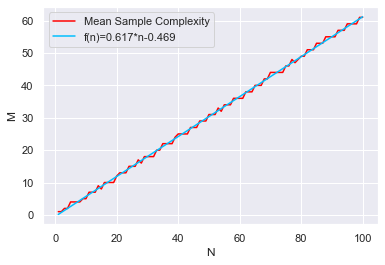

In [300]:
plt.figure()
plt.plot(np.arange(1, 101), m_LS, label = "Mean Sample Complexity", c = "red")
plt.plot(np.arange(1, 101), fit, label = "f(n)=0.617*n-0.469", c = "deepskyblue")
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.savefig('leastsquares.png')
plt.show()

In [ ]:
m_perceptron = sample_complexity(perceptron)

In [309]:
z = np.polyfit(np.arange(1, 101), m_perceptron, 1)
x = np.arange(1, 101)
fit = z[0]*x+z[1]
print(z)

[1.13551755 2.09636364]


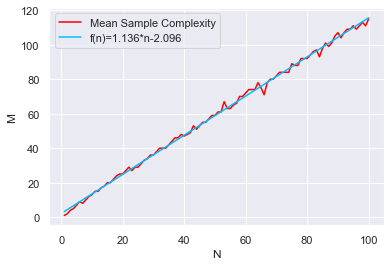

In [311]:
plt.figure()
plt.plot(np.arange(1, 101), m_perceptron, label = "Mean Sample Complexity", c = "red")
plt.plot(np.arange(1, 101), fit, label = "f(n)=1.136*n-2.096", c = "deepskyblue")
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.savefig('perceptron.png')
plt.show()

In [ ]:
m_winnow = sample_complexity(winnow)

In [313]:
z = np.polyfit(np.log(np.arange(1, 101)), m_winnow, 1)
x = np.arange(1, 101)
fit = z[0]*np.log(x)+z[1]
print(z)

[3.87313283 1.09189083]


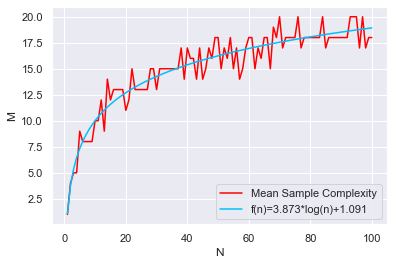

In [316]:
plt.figure()
plt.plot(np.arange(1, 101), m_winnow, label = "Mean Sample Complexity", c = "red")
plt.plot(np.arange(1, 101), fit, label = "f(n)=3.873*log(n)+1.091", c = "deepskyblue")
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.savefig('winnow.png')
plt.show()

In [ ]:
# Code modified to only run over dimensions 1-25 prior to running because of exponential growth
m_knn = sample_complexity(knn)

In [351]:
z = np.polyfit(np.exp(np.arange(1, 26)), m_knn, 1)
x = np.arange(1, 26)
fit = z[0]*np.exp(x)+z[1]
print(z)

[9.26437877e-07 3.59205573e+03]


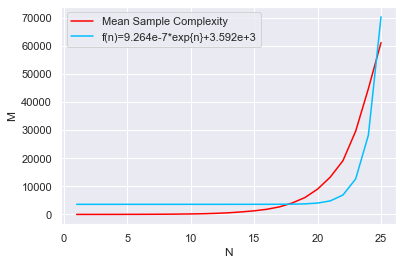

In [355]:
plt.figure()
plt.plot(np.arange(1, 26), m_knn, label = "Mean Sample Complexity", c = "red")
plt.plot(np.arange(1, 26), fit, label = "f(n)=9.264e-7*exp{n}+3.592e+3", c = "deepskyblue")
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.savefig('1nn.png')
plt.show()